In [91]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt
from altair import datum


In [66]:
modeling_df = pd.read_csv("../data/selected.csv")
empirical_cases = pd.read_csv("../data/results_sep13_2024.csv")
empirical_cases["date"] = empirical_cases.date.str.rsplit(" ", 0).str[2].tolist()
empirical_cases = empirical_cases.dropna()
empirical_cases.date = pd.to_datetime(empirical_cases['date'])

modeling_df

,date,week,New.Infections_S0,To.Aware_S0,r_t_S0,New.Infections_S1,To.Aware_S1,r_t_S1,New.Infections_S2,To.Aware_S2,...,r_t_S7,New.Infections_S8,To.Aware_S8,r_t_S8,New.Infections_S9,To.Aware_S9,r_t_S9,New.Infections_S10,To.Aware_S10,r_t_S10
0,3/5/23,0,0,0,0,0,0,0.00,0,0,...,0.00,0,0,0.00,0,0,0.00,0,0,0.00
1,3/12/23,1,0,1,0,0,1,0.03,1,1,...,0.23,1,4,0.11,1,9,0.11,2,13,0.10
2,3/19/23,2,0,0,0,0,0,0.12,0,0,...,0.58,1,6,0.11,2,10,0.13,3,14,0.16
3,3/26/23,3,0,0,0,0,0,0.00,1,0,...,0.00,1,5,0.18,2,11,0.16,5,16,0.21
4,4/2/23,4,0,0,0,0,0,0.00,0,0,...,0.00,1,6,0.12,2,12,0.16,4,18,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,9/22/24,81,0,0,0,0,0,0.00,0,0,...,0.97,2,5,0.22,4,12,0.23,5,18,0.22
82,9/29/24,82,0,0,0,0,0,0.00,0,0,...,0.93,2,5,0.27,3,13,0.23,3,18,0.13
83,10/6/24,83,0,0,0,0,0,0.00,0,0,...,1.02,1,6,0.16,4,12,0.26,5,17,0.23
84,10/13/24,84,0,0,0,0,0,0.00,0,0,...,0.92,2,6,0.26,3,12,0.22,5,17,0.21


In [67]:
empirical_cases

,date,Empirical # of diagnosed cases,Model (FoI=1) diagnosed cases,Model (FoI=1) incidence,Model (FoI=1) symp,Model (FoI=1) R_e,Model (FoI=1.25) diagnosed cases,Model (FoI=1.25) incidence,Model (FoI=1.25) symp,Model (FoI=1.25) R_e,Model (FoI=1.5) diagnosed cases,Model (FoI=1.5) incidence,Model (FoI=1.5) symp,Model (FoI=1.5) R_e,Model (FoI=2) diagnosed cases,Model (FoI=2) incidence
1,2022-07-16,125,123,140,279,2.320441989,123,140,279,2.320442,123,140,279,2.320442,123,140
2,2022-07-23,185,179,249,392,2.677419355,179,249,392,2.677419,179,249,392,2.677419,179,249
3,2022-07-30,221,202,302,495,2.31122449,202,302,495,2.311224,202,302,495,2.311224,202,302
4,2022-08-06,264,226,391,619,2.36969697,226,391,619,2.369697,226,391,619,2.369697,226,391
5,2022-08-13,261,258,143,645,0.693053312,258,143,645,0.693053,258,143,645,0.693053,258,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2024-07-27,6,0,1,0,3,1,1,2,1.000000,4,4,9,1.500000,950,877
108,2024-08-03,7,0,0,1,#DIV/0!,1,1,2,1.500000,4,2,7,0.666667,860,800
109,2024-08-10,5,0,0,1,0,0,0,1,0.000000,2,4,7,1.714286,797,713
110,2024-08-17,6,0,0,0,0,1,0,1,0.000000,3,4,9,1.714286,683,654


In [68]:
empirical_cases= empirical_cases[["date", "Empirical # of diagnosed cases"]]

In [69]:

cases_bar =  alt.Chart(empirical_cases[empirical_cases.date > "2023-03-01"], title = "").mark_bar(interpolate='monotone', opacity = 0.3 ,color = "black", clip = True).encode(
    alt.X('date:T', axis=alt.Axis(title="",tickCount = "month", grid=False,format="%B %Y", labelFontSize = 16)),
    alt.Y('Empirical # of diagnosed cases',axis=alt.Axis(title="Diagnosed Cases", grid=False, titleFontSize = 16),stack = False),

    

).properties(
    width=800,
    height=300
)
cases_bar

alt.Chart(...)

In [70]:
long_prop_iso_df = pd.melt(modeling_df, id_vars='date', value_vars=['To.Aware_S7', 'To.Aware_S6', 'To.Aware_S5', "To.Aware_S4", "To.Aware_S3"])
long_prop_iso_df.date = pd.to_datetime(long_prop_iso_df.date)

long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S7"] = "0.0"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S6"] = "0.2"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S5"] = "0.3"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S4"] = "0.4"
long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S3"] = "0.5"


long_prop_iso_df.head()

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_81033/429253618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S7"] = "0.0"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_81033/429253618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_prop_iso_df.variable[long_prop_iso_df.variable == "To.Aware_S6"] = "0.2"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_81033/429253618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,date,variable,value
0,2023-03-05,0.0,0
1,2023-03-12,0.0,1
2,2023-03-19,0.0,1
3,2023-03-26,0.0,1
4,2023-04-02,0.0,1


In [71]:
stream_graph_all =  alt.Chart(long_prop_iso_df, title = "").mark_line(interpolate='monotone', opacity = 1 ,color = "#f58518", clip = True).encode(
    alt.X('date:T', axis=alt.Axis(title="",tickCount = "month", grid=False,format="%B %Y")),
    alt.Y('value',axis=alt.Axis(title="Diagnosed Cases", grid=False, labelFontSize = 16),stack = False),

    alt.Color('variable:N',legend=alt.Legend(title= "Diagnosed mpox cases",offset = -100, labelFontSize = 10, titleFontSize = 10)),


).properties(
    width=800,
    height=300
)

stream_graph_all + cases_bar

alt.LayerChart(...)

In [72]:
stream_graph_all =  alt.Chart(long_prop_iso_df, title = "").mark_line(interpolate='monotone', opacity = 1 ,color = "#f58518", clip = True).encode(
    alt.X('date:T', axis=alt.Axis(title="",tickCount = "month", grid=False,format="%B %Y")),
    alt.Y('value',axis=alt.Axis(title="Diagnosed Cases", grid=False, labelFontSize = 16),stack = False),

    alt.Color('variable:N',legend=alt.Legend(title= "P(Iso | dx)",offset = -100, labelFontSize = 16, titleFontSize = 16)),


).properties(
    width=800,
    height=300
).transform_filter(datum.variable != "0.0")

stream_graph_all + cases_bar

alt.LayerChart(...)

In [73]:
modeling_df

,date,week,New.Infections_S0,To.Aware_S0,r_t_S0,New.Infections_S1,To.Aware_S1,r_t_S1,New.Infections_S2,To.Aware_S2,...,r_t_S7,New.Infections_S8,To.Aware_S8,r_t_S8,New.Infections_S9,To.Aware_S9,r_t_S9,New.Infections_S10,To.Aware_S10,r_t_S10
0,3/5/23,0,0,0,0,0,0,0.00,0,0,...,0.00,0,0,0.00,0,0,0.00,0,0,0.00
1,3/12/23,1,0,1,0,0,1,0.03,1,1,...,0.23,1,4,0.11,1,9,0.11,2,13,0.10
2,3/19/23,2,0,0,0,0,0,0.12,0,0,...,0.58,1,6,0.11,2,10,0.13,3,14,0.16
3,3/26/23,3,0,0,0,0,0,0.00,1,0,...,0.00,1,5,0.18,2,11,0.16,5,16,0.21
4,4/2/23,4,0,0,0,0,0,0.00,0,0,...,0.00,1,6,0.12,2,12,0.16,4,18,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,9/22/24,81,0,0,0,0,0,0.00,0,0,...,0.97,2,5,0.22,4,12,0.23,5,18,0.22
82,9/29/24,82,0,0,0,0,0,0.00,0,0,...,0.93,2,5,0.27,3,13,0.23,3,18,0.13
83,10/6/24,83,0,0,0,0,0,0.00,0,0,...,1.02,1,6,0.16,4,12,0.26,5,17,0.23
84,10/13/24,84,0,0,0,0,0,0.00,0,0,...,0.92,2,6,0.26,3,12,0.22,5,17,0.21


In [74]:
scenario_intro_long = pd.melt(modeling_df, id_vars='date', value_vars=['New.Infections_S8', 'New.Infections_S9', 'New.Infections_S10'])
scenario_intro_long.date = pd.to_datetime(scenario_intro_long.date)

scenario_intro_long.variable[scenario_intro_long.variable == "New.Infections_S8"] = "5"
scenario_intro_long.variable[scenario_intro_long.variable == "New.Infections_S9"] = "10"
scenario_intro_long.variable[scenario_intro_long.variable == "New.Infections_S10"] = "15"



scenario_intro_long.head()

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_81033/1619705603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenario_intro_long.variable[scenario_intro_long.variable == "New.Infections_S8"] = "5"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_81033/1619705603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenario_intro_long.variable[scenario_intro_long.variable == "New.Infections_S9"] = "10"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_81033/1619705603.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

,date,variable,value
0,2023-03-05,5,0
1,2023-03-12,5,1
2,2023-03-19,5,1
3,2023-03-26,5,1
4,2023-04-02,5,1


In [75]:
scenario_intro_plot =  alt.Chart(scenario_intro_long, title = "").mark_point(interpolate='monotone', opacity = 1 ,color = "#f58518", clip = True).encode(
    alt.X('date:T', axis=alt.Axis(title="",tickCount = "month", grid=False,format="%B %Y")),
    alt.Y('value',axis=alt.Axis(title="Diagnosed Cases", grid=False, labelFontSize = 16),stack = False),

    alt.Color('variable:N',legend=alt.Legend(title= "",offset = -100, labelFontSize = 10, titleFontSize = 10)),


).properties(
    width=800,
    height=300
)

scenario_intro_plot + cases_bar

alt.LayerChart(...)

In [76]:

# Altair Chart with rolling mean
chart = alt.Chart(scenario_intro_long).transform_window(
    # Calculate rolling mean
    rolling_mean='mean(value)',
    # Define frame for rolling mean (e.g., previous 2 rows and current row)
    frame=[-2, 0],
    # Group by 'group' and order by 'time'
    groupby=['variable'],
    sort=[alt.SortField('date', order='ascending')]
).mark_line().encode(
    x='date:T',
    y='rolling_mean:Q',
    color=alt.Color('variable:N', legend=alt.Legend(title= "Number of Imports per week",offset = -250, labelFontSize = 10, titleFontSize = 10)),  # Different colors for different groups
).properties(
    title="Scenario Analysis with Constant Force of Importation",
    width=700,
    height=200
)

chart +scenario_intro_plot + cases_bar


alt.LayerChart(...)

In [89]:
scenario_intro_long

,date,variable,value
0,2023-03-05,5,0
1,2023-03-12,5,1
2,2023-03-19,5,1
3,2023-03-26,5,1
4,2023-04-02,5,1
...,...,...,...
253,2024-09-22,15,5
254,2024-09-29,15,3
255,2024-10-06,15,5
256,2024-10-13,15,5


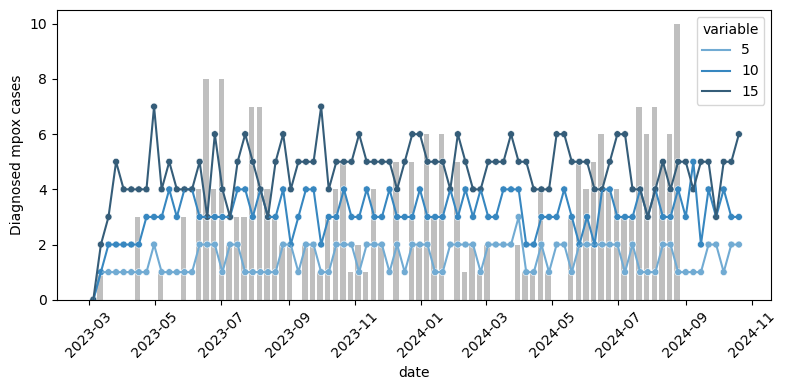

In [113]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(  empirical_cases.date[empirical_cases.date > "2023-03-01"] ,empirical_cases["Empirical # of diagnosed cases"][empirical_cases.date > "2023-03-01"], color = "gray", alpha = 0.5, width = 5)

# Plot each block of the shaded region
# for index, row in combined_monthly_inc_genomes.iterrows():
#     #print(row)
#     if index == 28:
#         index = index-1
#     else:
#         index = index
#     ax.fill_between([row['year-month'], combined_monthly_inc_genomes.loc[index+1, "year-month"]], row['genome_prop_lower'],  row['genome_prop_upper'], color='gray', alpha=0.5)
#     ax.plot([row['year-month'], combined_monthly_inc_genomes.loc[index+1, "year-month"]], [row['genome_prop_median'],row['genome_prop_median']], color='k', marker='o')

# Plot each block of the proportion line as horizontal bars

sns.lineplot(
    data=scenario_intro_long,
    x='date',
    y='value',
    hue='variable',
    palette='Blues_d',
    legend='full'
)


sns.scatterplot(
    data=scenario_intro_long,
    x='date',
    y='value',
    hue = "variable",
    palette = "Blues_d",
    s=25,  # Adjust point size
    marker='o', 
    legend = None
)

# Format the x-axis for dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.xticks(rotation=45)

# Set axis labels
ax.set_ylabel('Diagnosed mpox cases')
#ax.set_ylim(0, 0.10)  # Y-axis limits

# Show the plot
plt.tight_layout()
#plt.savefig('../figures/prop_cases_seq.png',dpi=300,bbox_inches='tight')
plt.show()